In [1]:
%matplotlib inline 
import laim.read_config as reader
from laim.laim_db import *
import laim.laim_db_solve as AIM_solver
import laim.ml.nn as neural_net
input = "config.ini"
system_param, db_param, aim_param, learn_param = reader.get_config(input)

Starting run with 1 MPI rank(s) at : 2021-02-23 16:20:08.994372


The above lines of code imports all of the necessary LAIM libraries and input files needed to create a database of 20 AIM solutions. 

# Generating the database
The first step is to generate the database of AIM parameters and hybridisation functions.


#################  Generating database  #####################

Checking if ./data/ exists on root node
Database already exists, we delete
Database is here:  /home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/
------ Database viz -------


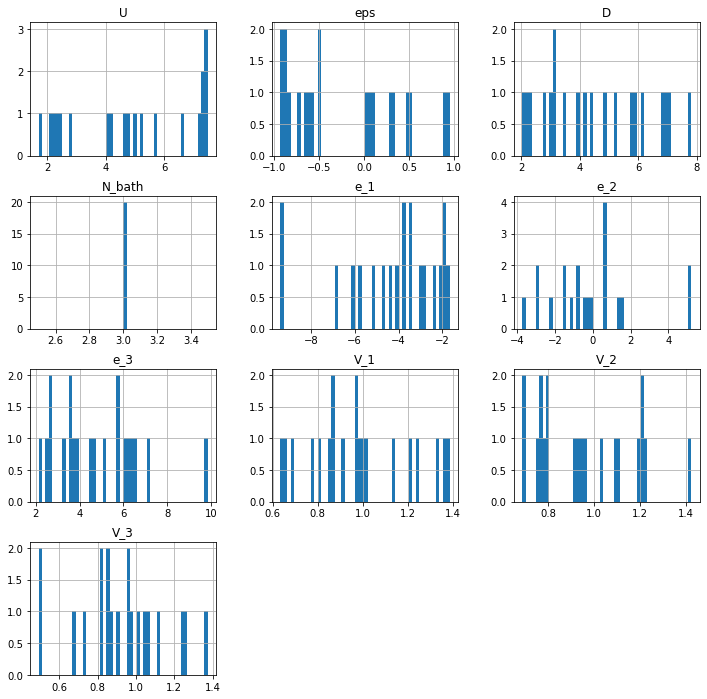


#################  Database generated  #####################


#################  Generating hybridisation  #####################

Generated 20 Hybridisations in tau in 1.26 s on core MPI core # 0 

#################  Hybridisation generated  #####################



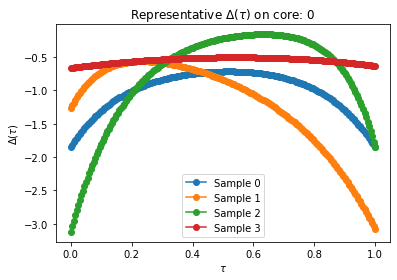

In [2]:
gen_db(system_param, db_param)

This has created a database of AIM solutions with 20 entries. The first image illustrates the distribution of selected AIM parameters. In production, 20 entries is not nearly enough to obtain meaningful statistics, but in this case I am illustrating the workflow. The second image is a representative sample of the hybridisation functions generated. 

# Populating the database with solutions

********************  Running PT  ********************

********************  Running SC  ********************

********************  Running ED_Q ********************

/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_PT_1_00_tau.csv
/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_ED_Q_1_00_tau.csv
/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_SC_1_00_tau.csv


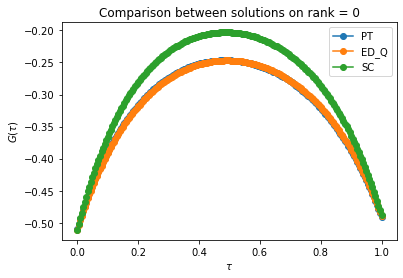

/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_PT_1_00_legendre.csv
/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_ED_Q_1_00_legendre.csv
/home/evan/CODE/MY_PROJECTS/dmft_database/work/feb_2021/v1/code_v1/laim/examples/AIM_20_entries.CLI_serial.JUPYTER/data/G_SC_1_00_legendre.csv


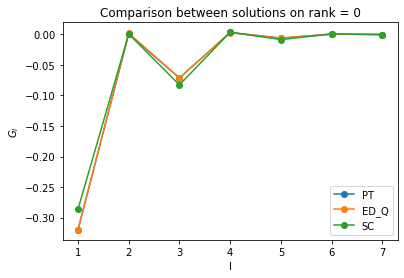

In [3]:
AIM_solver.solve_AIM(system_param, db_param, aim_param)

The previous action solves the AIM for each entry in the database using 3 separate solvers: (i) perturbation theory (ii) strong coupling expansion and (iii) exact diagonalisation. (iii) is the true answer and (i) and (ii) are approximations. The idea of the neural network is to learn the error between the approximations and the true answer. 

I show example solutions for 1 entry in the database above in both the $\tau$ and legendre polynomial bases. 

# Training a neural network 

Training the neural network

Learning
Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0980 - mae: 0.2691 - max_error: 0.6254 - boundary_cond: 0.0030 - val_loss: 0.0996 - val_mae: 0.2804 - val_max_error: 0.5775 - val_boundary_cond: 0.0019
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0966 - mae: 0.2670 - max_error: 0.5998 - boundary_cond: 0.0015 - val_loss: 0.0981 - val_mae: 0.2781 - val_max_error: 0.5757 - val_boundary_cond: 6.9934e-04
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0950 - mae: 0.2646 - max_error: 0.6211 - boundary_cond: 4.8204e-04 - val_loss: 0.0961 - val_mae: 0.2751 - val_max_error: 0.5741 - val_boundary_cond: 4.0531e-04
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0928 - mae: 0.2611 - max_error: 0.6192 - boundary_cond: 7.5555e-04 - val_loss: 0.0933 - val_mae: 0.2707 - val_max_error: 0.5717 - val_boundary_cond: 0.0012
Epoch 5/100
4/4 [============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0050 - mae: 0.0537 - max_error: 0.1948 - boundary_cond: 5.6674e-04 - val_loss: 0.0048 - val_mae: 0.0499 - val_max_error: 0.2226 - val_boundary_cond: 4.3297e-04
Epoch 37/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0050 - mae: 0.0532 - max_error: 0.2243 - boundary_cond: 5.5194e-04 - val_loss: 0.0048 - val_mae: 0.0500 - val_max_error: 0.2229 - val_boundary_cond: 4.0501e-04
Epoch 38/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0532 - max_error: 0.1851 - boundary_cond: 4.9593e-04 - val_loss: 0.0048 - val_mae: 0.0499 - val_max_error: 0.2229 - val_boundary_cond: 4.0281e-04
Epoch 39/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0533 - max_error: 0.1735 - boundary_cond: 5.5172e-04 - val_loss: 0.0048 - val_mae: 0.0500 - val_max_error: 0.2228 - val_boundary_cond: 3.9184e-04
Epoch 40/100
4/4 [==============================] - 0s 6ms/step - loss: 0.004

4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0471 - max_error: 0.2164 - boundary_cond: 0.0013 - val_loss: 0.0043 - val_mae: 0.0458 - val_max_error: 0.2197 - val_boundary_cond: 0.0014
Epoch 72/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0469 - max_error: 0.2167 - boundary_cond: 0.0013 - val_loss: 0.0043 - val_mae: 0.0456 - val_max_error: 0.2192 - val_boundary_cond: 0.0015
Epoch 73/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0471 - max_error: 0.2101 - boundary_cond: 0.0014 - val_loss: 0.0042 - val_mae: 0.0452 - val_max_error: 0.2188 - val_boundary_cond: 0.0015
Epoch 74/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0463 - max_error: 0.2070 - boundary_cond: 0.0014 - val_loss: 0.0042 - val_mae: 0.0451 - val_max_error: 0.2184 - val_boundary_cond: 0.0016
Epoch 75/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0462 - max_error: 0.2

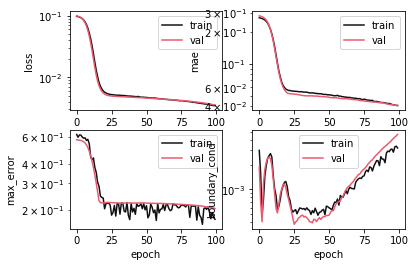



------------------------------ > Saving image: NN-details.png < ------------------------------
------------------------------ > Saving Neural Network to nn.h5 < ------------------------------


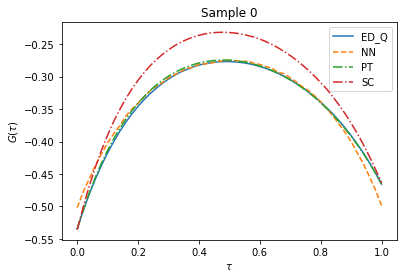

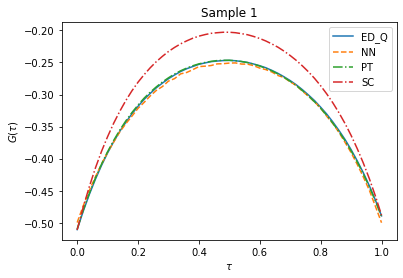

In [4]:
net = neural_net.NN(system_param, learn_param)
net.train()

A neural network has been trained for 100 epochs. The first plot illustrates the performance of the network and the value of the minimized metric, which in this case is the MSDE. The final two plots are samples of the neural network solving the AIM for the validation set. Clearly the NN is better than the strong coupling expansion, but for such a small database this solver will not be better than the perturbation theory result.